In [1]:
import pandas as pd

In [2]:
housing_price = pd.read_csv("Datasets/Housing_Train.csv")

In [3]:
housing_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_price_clean = housing_price.dropna(axis = 1)

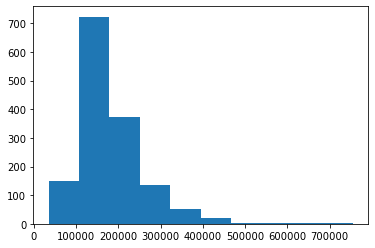

In [6]:
import matplotlib.pyplot as plt
plt.hist(housing_price_clean.SalePrice)
plt.show()

In [7]:
housing_price_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [8]:
housing_price_clean.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
housing_price_dummies = pd.get_dummies(housing_price_clean,
                                      columns = housing_price_clean.select_dtypes('object').columns,
                                      drop_first = True)

In [10]:
housing_price_dummies.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 190 columns):
 #    Column                 Dtype
---   ------                 -----
 0    Id                     int64
 1    MSSubClass             int64
 2    LotArea                int64
 3    OverallQual            int64
 4    OverallCond            int64
 5    YearBuilt              int64
 6    YearRemodAdd           int64
 7    BsmtFinSF1             int64
 8    BsmtFinSF2             int64
 9    BsmtUnfSF              int64
 10   TotalBsmtSF            int64
 11   1stFlrSF               int64
 12   2ndFlrSF               int64
 13   LowQualFinSF           int64
 14   GrLivArea              int64
 15   BsmtFullBath           int64
 16   BsmtHalfBath           int64
 17   FullBath               int64
 18   HalfBath               int64
 19   BedroomAbvGr           int64
 20   KitchenAbvGr           int64
 21   TotRmsAbvGrd           int64
 22   Fireplaces             int64
 23   GarageCars 

In [11]:
X_variables = housing_price_dummies.loc[:, housing_price_dummies.columns != 'SalePrice']

In [12]:
print(X_variables.columns.shape)
print(housing_price_dummies.columns.shape)

(189,)
(190,)


In [13]:
Y_variable = housing_price_dummies['SalePrice']

In [77]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X_variables)
Y_scaled = (Y_variable - Y_variable.mean())/Y_variable.std()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.20, random_state = 42)

In [82]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1.168000e+03,1.168000e+03,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.000961,-0.001134,0.017320,0.016101,0.008466,-0.010004,0.001527,0.005229,-0.008662,0.007595,...,-3.650048e-17,-3.041707e-17,-0.001856,-0.007563,-0.004044,0.013104,-0.024655,0.014731,0.012495,-0.006120
std,1.009262,1.005812,1.078326,0.989220,1.003276,1.015995,1.004633,1.006863,0.981109,1.010525,...,1.000428e+00,1.000428e+00,0.997628,0.913419,1.004805,1.118129,0.855237,1.060193,0.989853,0.991300
min,-1.730865,-0.872563,-0.923729,-3.688413,-4.112970,-3.287824,-1.689368,-0.973018,-0.288653,-1.284176,...,-5.862104e-02,-5.862104e-02,-0.301962,-0.045376,-2.562180,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
25%,-0.877296,-0.872563,-0.293608,-0.795151,-0.517200,-0.605043,-0.914112,-0.973018,-0.288653,-0.780458,...,-5.862104e-02,-5.862104e-02,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
50%,0.004745,-0.163109,-0.091886,-0.071836,-0.517200,0.024251,0.442586,-0.129709,-0.288653,-0.197504,...,-5.862104e-02,-5.862104e-02,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
75%,0.880855,0.309859,0.118580,0.651479,0.381743,0.984752,0.927122,0.608324,-0.288653,0.550149,...,-5.862104e-02,-5.862104e-02,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
max,1.730865,3.147673,20.518273,2.821425,3.078570,1.282839,1.217843,11.405753,6.699887,4.004295,...,1.705872e+01,1.705872e+01,3.311678,22.037846,0.390293,19.078784,10.984838,8.485281,0.467651,3.268027


In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
X_train1 = pd.DataFrame(X_train,columns = X_variables.columns)

In [31]:
X_train1.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.128206,-0.872563,-0.212153,-0.795151,0.381743,-0.472560,-1.350194,1.049169,-0.288653,-0.396727,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.798404,0.073375,-0.268578,-0.071836,1.280685,0.719786,0.442586,-0.973018,-0.288653,0.524681,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.217100,-0.636078,-0.174369,-0.795151,1.280685,-2.029235,-1.689368,-0.973018,-0.288653,0.517889,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.164901,-0.163109,-0.332419,-0.795151,1.280685,-1.134975,-1.689368,0.274948,-0.288653,-0.917424,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,-0.829249,-0.163109,-0.552908,-0.795151,0.381743,-1.565545,-1.689368,-0.494887,-0.288653,0.545056,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [44]:
X_train1.shape
#y_train.shape

(1168, 189)

In [32]:
linreg.fit(X_train1, y_train)

LinearRegression()

In [33]:
linreg.coef_

array([ 3.57329603e-03,  2.63400724e-02,  7.63261218e-02,  1.42151360e-01,
        7.46872111e-02,  1.31964570e-01,  3.43908252e-02,  3.87797788e+11,
        1.37161848e+11,  3.75697753e+11, -3.73009574e+11, -2.48092980e+11,
       -2.80142462e+11, -3.12039002e+10,  3.37227443e+11,  1.42006879e-02,
       -5.83849382e-03,  2.12941817e-02,  6.64321873e-03, -4.81048066e-02,
       -3.99778967e-02,  2.93597208e-02,  2.86258462e-02,  6.80077914e-03,
        6.96769483e-02,  1.99506228e-02,  9.79968051e-03,  4.74534448e-03,
        1.52934812e-02,  2.85064964e-02,  2.84298877e-02, -2.36288381e-03,
       -1.91646863e-02, -5.20229340e-04,  7.80639648e-02,  3.20129395e-02,
        1.24511719e-01,  1.15783691e-01,  2.47383118e-02,  1.39999390e-02,
        8.91113281e-03,  5.18798828e-04,  4.29840088e-02, -9.45281982e-03,
        2.35273838e-02, -6.91986084e-03,  2.98614502e-02, -1.20010376e-02,
       -1.49534941e-02, -1.09863281e-03,  2.90985107e-02, -1.86309814e-02,
       -4.65393066e-03,  

In [17]:
linreg.coef_

array([ 3.57329603e-03,  2.63400724e-02,  7.63261218e-02,  1.42151360e-01,
        7.46872111e-02,  1.31964570e-01,  3.43908252e-02,  3.87797788e+11,
        1.37161848e+11,  3.75697753e+11, -3.73009574e+11, -2.48092980e+11,
       -2.80142462e+11, -3.12039002e+10,  3.37227443e+11,  1.42006879e-02,
       -5.83849382e-03,  2.12941817e-02,  6.64321873e-03, -4.81048066e-02,
       -3.99778967e-02,  2.93597208e-02,  2.86258462e-02,  6.80077914e-03,
        6.96769483e-02,  1.99506228e-02,  9.79968051e-03,  4.74534448e-03,
        1.52934812e-02,  2.85064964e-02,  2.84298877e-02, -2.36288381e-03,
       -1.91646863e-02, -5.20229340e-04,  7.80639648e-02,  3.20129395e-02,
        1.24511719e-01,  1.15783691e-01,  2.47383118e-02,  1.39999390e-02,
        8.91113281e-03,  5.18798828e-04,  4.29840088e-02, -9.45281982e-03,
        2.35273838e-02, -6.91986084e-03,  2.98614502e-02, -1.20010376e-02,
       -1.49534941e-02, -1.09863281e-03,  2.90985107e-02, -1.86309814e-02,
       -4.65393066e-03,  

In [34]:
linreg.intercept_

-25600.796613432103

In [36]:
linreg.score(X_train1,y_train)

0.92291082030423

In [37]:
from sklearn import metrics
import numpy as np
y_train.pred = linreg.predict(X_train1)
rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train, y_train.pred)),3)
print(rmse_train)

0.27


In [65]:
import statsmodels.api as sm
X_var = sm.add_constant(X_train1)
X_var.shape
X_var.info(verbose = True)
y_var = y_train.reset_index()['SalePrice']
model = sm.OLS(y_var,X_var).fit()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 189 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    Id                     float64
 1    MSSubClass             float64
 2    LotArea                float64
 3    OverallQual            float64
 4    OverallCond            float64
 5    YearBuilt              float64
 6    YearRemodAdd           float64
 7    BsmtFinSF1             float64
 8    BsmtFinSF2             float64
 9    BsmtUnfSF              float64
 10   TotalBsmtSF            float64
 11   1stFlrSF               float64
 12   2ndFlrSF               float64
 13   LowQualFinSF           float64
 14   GrLivArea              float64
 15   BsmtFullBath           float64
 16   BsmtHalfBath           float64
 17   FullBath               float64
 18   HalfBath               float64
 19   BedroomAbvGr           float64
 20   KitchenAbvGr           float64
 21   TotRmsAbvGrd           float64
 22 

In [66]:
y_var.head()

0   -0.452166
1   -0.036771
2   -1.207429
3   -0.074534
4   -0.678745
Name: SalePrice, dtype: float64

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     63.55
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        07:56:45   Log-Likelihood:                -127.68
No. Observations:                1168   AIC:                             627.4
Df Residuals:                     982   BIC:                             1569.
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                        0.0035      0.009      0.373      0.709      -0.015       0.022
MSSubClass                0.0258      0.060      0.429      0.668      -0.092       0.144
LotArea                   0.0764      0.016      4.787      0.000       0.045       0.108
OverallQual               0.1421      0.020      7.201      0.000       0.103       0.181
OverallCond               0.0746      0.013      5.635      0.000       0.049       0.101
YearBuilt                 0.1319      0.031      4.287      0.000       0.072       0.192
YearRemodAdd              0.0341      0.016      2.131      0.033       0.003       0.066
BsmtFinSF1                0.1179      0.012      9.507      0.000       0.094       0.142
BsmtFinSF2                0.0103      0.010      1.020      0.308      -0.009       0.030
BsmtUnfSF                -0.0048      0.011     -0.440      0.660      -0.026       0.017
TotalBsmtSF               0.1215      0.018      6.654      0.000       0.086       0.157
1stFlrSF                  0.0731      0.022      3.373      0.001       0.031       0.116
2ndFlrSF                  0.1894      0.021      8.840      0.000       0.147       0.231
LowQualFinSF              0.0072      0.013      0.540      0.589      -0.019       0.034
GrLivArea                 0.2117      0.017     12.328      0.000       0.178       0.245
BsmtFullBath              0.0143      0.014      1.006      0.315      -0.014       0.042
BsmtHalfBath             -0.0056      0.010     -0.536      0.592      -0.026       0.015
FullBath                  0.0212      0.017      1.217      0.224      -0.013       0.055
HalfBath                  0.0068      0.015      0.457      0.647      -0.022       0.036
BedroomAbvGr             -0.0482      0.016     -3.017      0.003      -0.080      -0.017
KitchenAbvGr             -0.0403      0.017     -2.421      0.016      -0.073      -0.008
TotRmsAbvGrd              0.0298      0.022      1.334      0.182      -0.014       0.074
Fireplaces                0.0284      0.012      2.305      0.021       0.004       0.053
GarageCars                0.0065      0.023      0.280      0.780      -0.039       0.052
GarageArea                0.0699      0.023      3.037      0.002       0.025       0.115
WoodDeckSF                0.0200      0.010      1.948      0.052      -0.000       0.040
OpenPorchSF               0.0098      0.010      0.935      0.350      -0.011       0.030
EnclosedPorch             0.0045      0.011      0.411      0.681      -0.017       0.026
3SsnPorch                 0.0154      0.009      1.767      0.078      -0.002       0.032
ScreenPorch               0.0285      0.010      2.890      0.004       0.009       0.048
PoolArea                  0.0285      0.010      2.729      0.006       0.008       0.049
MiscVal                

In [87]:
from statsmodels.tools.eval_measures import rmse
ypred = model.predict(X_train)
rmse_train = rmse(y_train,ypred)
print(rmse_train)

0.26992139049756675


In [68]:
coef_data_frame = pd.DataFrame({'Columns': X_variables.columns, 'Coef': linreg.coef_})

In [76]:
coef_data_frame.head()
sorted_coef_data_frame = coef_data_frame.sort_values('Coef',ascending = False)
sorted_coef_data_frame.head(10)

,Columns,Coef
7,BsmtFinSF1,3.877978e+11
9,BsmtUnfSF,3.756978e+11
131,Exterior2nd_CBlock,3.522513e+11
14,GrLivArea,3.372274e+11
8,BsmtFinSF2,1.371618e+11
107,RoofMatl_CompShg,1.083893e+00
111,RoofMatl_Tar&Grv,6.891479e-01
113,RoofMatl_WdShngl,5.642090e-01
112,RoofMatl_WdShake,4.749947e-01
110,RoofMatl_Roll,2.200012e-01


Text(0, 0.5, 'Features')

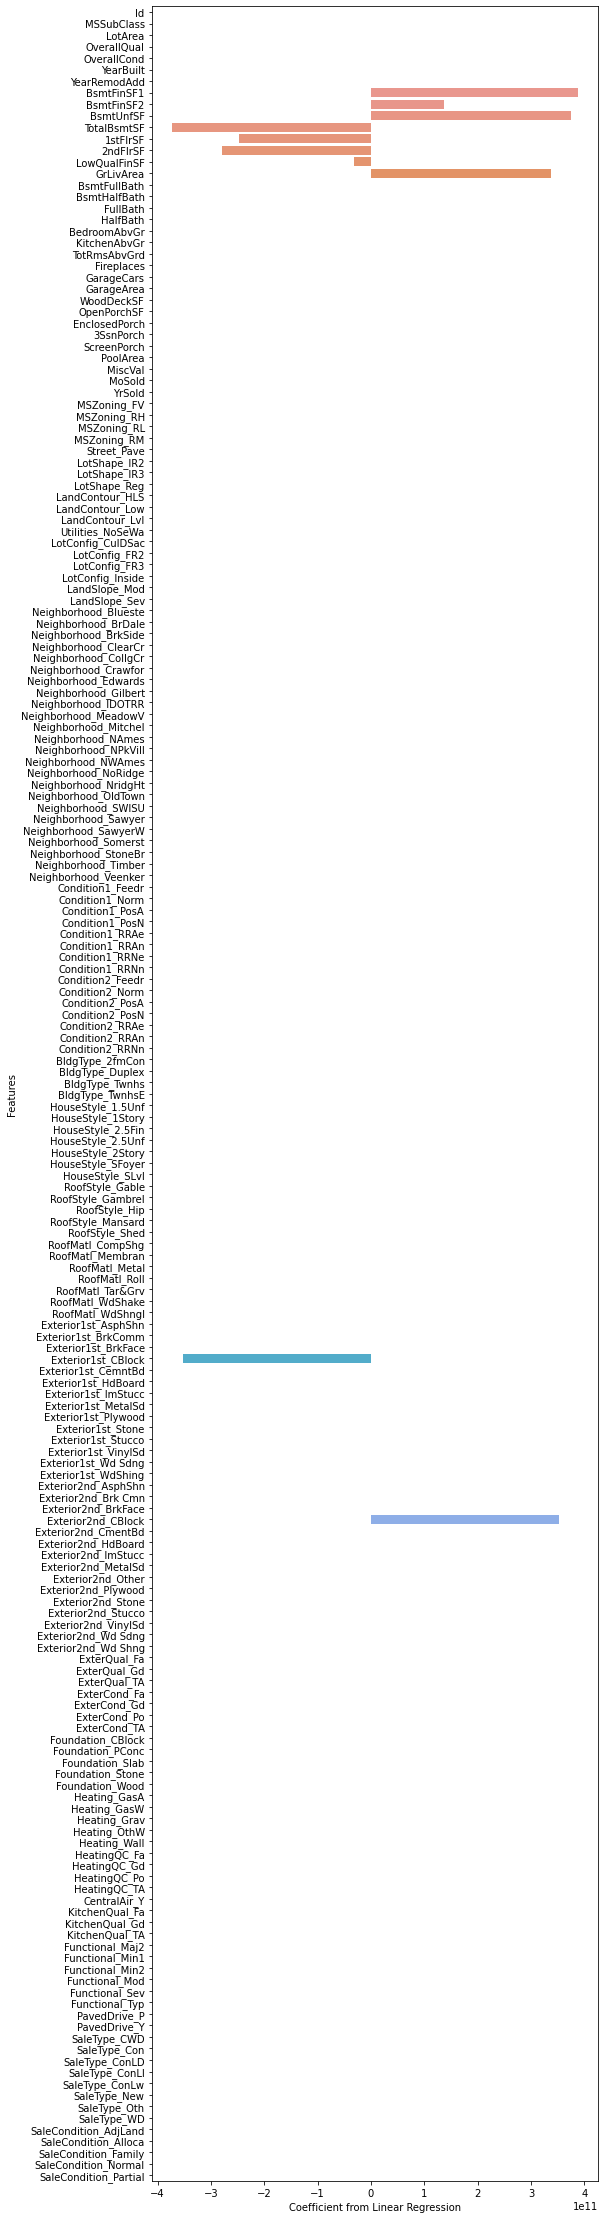

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,40))
sns.barplot(x = 'Coef',y = 'Columns',data = coef_data_frame)
plt.xlabel('Coefficient from Linear Regression')
plt.ylabel('Features')

In [74]:
max(coef_data_frame.Coef)

387797787953.00433

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1, max_iter = 2000)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=2000)

In [89]:
ypred = ridge.predict(X_train)
rmse_train = rmse(y_train, ypred)
print(rmse_train)

y_test_pred = ridge.predict(X_test)
rmse_test = rmse(y_test,y_test_pred)
print(rmse_test)

0.2701800409085093
0.6038698687052432


In [90]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter = 2000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=2000)

In [91]:
ypred = lasso.predict(X_train)
rmse_train = rmse(y_train, ypred)
print(rmse_train)

y_test_pred = lasso.predict(X_test)
rmse_test = rmse(y_test,y_test_pred)
print(rmse_test)

0.3407801049373927
0.4038677260084393


In [92]:
lasso_coef_df = pd.DataFrame({'Columns':X_variables.columns, 'Coef':lasso.coef_})

In [93]:
lasso_coef_sorted = lasso_coef_df.sort_values('Coef',ascending = False)

In [96]:
print(lasso_coef_sorted.to_string())

                   Columns      Coef
14               GrLivArea  0.285373
3              OverallQual  0.225372
67    Neighborhood_NridgHt  0.122182
23              GarageCars  0.095114
5                YearBuilt  0.079392
66    Neighborhood_NoRidge  0.079006
73    Neighborhood_StoneBr  0.067548
7               BsmtFinSF1  0.059613
15            BsmtFullBath  0.058786
2                  LotArea  0.048002
4              OverallCond  0.046688
134    Exterior2nd_ImStucc  0.044365
113       RoofMatl_WdShngl  0.040815
22              Fireplaces  0.040716
6             YearRemodAdd  0.039647
188  SaleCondition_Partial  0.039633
46       LotConfig_CulDSac  0.039522
42         LandContour_HLS  0.035959
77         Condition1_Norm  0.033869
173         Functional_Typ  0.033683
17                FullBath  0.033627
116    Exterior1st_BrkFace  0.032794
25              WoodDeckSF  0.031317
57    Neighborhood_Crawfor  0.029845
21            TotRmsAbvGrd  0.028461
29             ScreenPorch  0.027177
7

In [99]:
lasso_coef_sorted.loc[lasso_coef_sorted.Coef==0].shape

(99, 2)